## UNDERSTANDING SEQUENTIAL MODEL'S RNN, LSTM & BASIC IMPLEMENTATION

In [18]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras import layers
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2


# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

### UNDERSTANDING RECURRENT NEURAL NETWORKS

In [2]:
print ("""
RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    
""")


RNN processes sequences by iterating through the sequence elements and maintaining 
a "state" containing information relative to what they have seen so far. 

Note: RNN is a loop

state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
    



### NUMPY IMPLEMENTATION OF RECURRENT NEURAL NETWORKS

In [3]:
timesteps = 100  # Number of timesteps in the input sequence
inputs_features = 32  # Dimensionality of the input feature space
output_features = 64  # Dimensionality of the output feature space


# This is our input data - just random noise for the sake of our example.
inputs = np.random.random((timesteps, inputs_features))
# This is our "initial state": an all-zero vector.
state_t = np.zeros((output_features,))



print ("Raw data\n")
print("Shape of input data: {}".format(inputs.shape))
print ("first 2 timestamps data \n{}\n".format(inputs[:2]))
print("Expected output shape/timestamp: {}".format(state_t.shape))
print ("Random initial output state \n{}\n".format(state_t))

# Creating random weight matrices
W = np.random.random((output_features, inputs_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  # input_t is a vector of shape (input_features,)
    # We combine the input with the current state
    # (i.e. the previous output) to obtain the current output.
    
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    # We store this output in a list.
    successive_outputs.append(output_t)
    
    # We update the "state" of the network for the next timestep
    state_t = output_t
    


display(Markdown("### result"))

# The final output is a 2D tensor of shape (timesteps, output_features).
# final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence = np.reshape(successive_outputs, (timesteps,output_features))

print ("We have a {} dimension vector for each time-step of input sequence\n".format(final_output_sequence.shape[1]))
print (final_output_sequence)

print ("""
Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)
""")

Raw data

Shape of input data: (100, 32)
first 2 timestamps data 
[[0.0030758  0.46985899 0.89690283 0.05238232 0.65744242 0.19632971
  0.30939058 0.29613717 0.79192052 0.82286975 0.60976795 0.1731055
  0.38214575 0.00422678 0.39830086 0.88804061 0.94010012 0.57475419
  0.89458728 0.4889283  0.27920695 0.12409206 0.95959822 0.23156727
  0.5942121  0.67483377 0.69991823 0.59664523 0.16478506 0.46201723
  0.7543931  0.49979216]
 [0.95935656 0.26085601 0.27962538 0.95975032 0.90714094 0.41221174
  0.52444856 0.17357491 0.1222391  0.960848   0.90096425 0.75734571
  0.93893578 0.9878426  0.6344592  0.23007864 0.87762901 0.51124514
  0.18715142 0.07574031 0.25812284 0.53941499 0.32339233 0.96344961
  0.06932016 0.30189039 0.25169184 0.40926816 0.09794491 0.8176083
  0.7549911  0.84538672]]

Expected output shape/timestamp: (64,)
Random initial output state 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### result

We have a 64 dimension vector for each time-step of input sequence

[[0.9999998  0.9999998  0.99999992 ... 0.99999998 1.         0.99999999]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]

Note:

- RNN in each loop, produce result for that particular timestamp
- While in a loop, RNN has output from earlier states stored in the form of state variable
- This output corresponds is produced when "return sequence = True" in rnn parameter initialization
- The above input data is 1 sample in a batch (for next sample the loop restarts)
- The above implementation is the actual Keras SimpleRNN layer 
(the only difference is it can process batches of sequence)



### Implementing above model using keras SimpleRNN layer

In [4]:
# model architecture
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True,input_shape=(100,32),name="rnn_layer"))
model.summary()

print ("""
Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.
""")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 6,208
Trainable params: 6,208
Non-trainable params: 0
_________________________________________________________________

Note:
In case of text, the embedding layer help to create this 2 dimensional input vector. 
In text each word represent the timestamp and word vector is smallest data unit.



### USING SIMPLE-RNN & RETURNING THE LAST STATE

In [5]:
#embedding layer initializations
n_vocab_embedding_layer = 10000
size_of_word_vector = 32

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector , input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, name = "rnn_layer"))
model.summary()


display(Markdown("### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES"))

model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, output_dim=size_of_word_vector, input_length=100,name="embedding_layer"))
model.add(SimpleRNN(64, return_sequences=True, name = "rnn_layer"))
model.summary()

print ("""
"return_sequences" parameter decides if the output is produced at each stage or final output is produced 
""")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 64)                6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


### USING SIMPLE-RNN & RETURNING ALL STATE's SEQUENCES

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 100, 32)           320000    
_________________________________________________________________
rnn_layer (SimpleRNN)        (None, 100, 64)           6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________

"return_sequences" parameter decides if the output is produced at each stage or final output is produced 



In [6]:
# function to plot model training logs
def plot_model_training_history(history_dict, plot_val=True, chart_type="--o"):
    acc = history_dict['acc']
    loss = history_dict['loss']
    
    if plot_val:
        val_acc = history_dict['val_acc']
        val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    # visualize model training
    epochs = range(1, len(acc) + 1)
    fig, axs = plt.subplots(1, 2,figsize=(15,5))
    axs[0].plot(epochs, loss, chart_type, label='Training loss')
    if plot_val:
        axs[0].plot(epochs, val_loss, chart_type, label='Validation loss')
        axs[0].set_title('training & validation loss')
    else:
        axs[0].set_title('training loss')
    axs[0].legend()
    
    axs[1].plot(epochs, acc, chart_type, label='Training acc')
    if plot_val:
        axs[1].plot(epochs, val_acc, chart_type, label='Validation acc')
        axs[1].set_title('training & validation accuracy')                      
    else:
        axs[1].set_title('training accuracy')                      
    axs[1].legend()
    plt.show()
    plt.close()


def plot_large_image_without_borders(path_to_image):
    # change the figure size
    fig2 = plt.figure(figsize = (15,15)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(cv2.imread(path_to_image), interpolation='none')
    plt.axis('off')
    plt.show()

### LOADING DATA FOR ALL THE BELOW MODEL

In [7]:
# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data encoding from text will be extensively covered in "text_pre-processing_basic_model_building"###


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review 1 sample input data

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

### TRAINING MODEL USING SIMPLE-RNN LAYER

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 999us/step - loss: 0.6080 - acc: 0.6512 - val_loss: 0.5518 - val_acc: 0.7276
Epoch 2/10
20000/20000 [==============================] - 20s 980us/step - loss: 0.3872 - acc: 0.8371 - val_loss: 0.3648 - val_acc: 0.8520
Epoch 3/10
20000/20000 [====================

### result

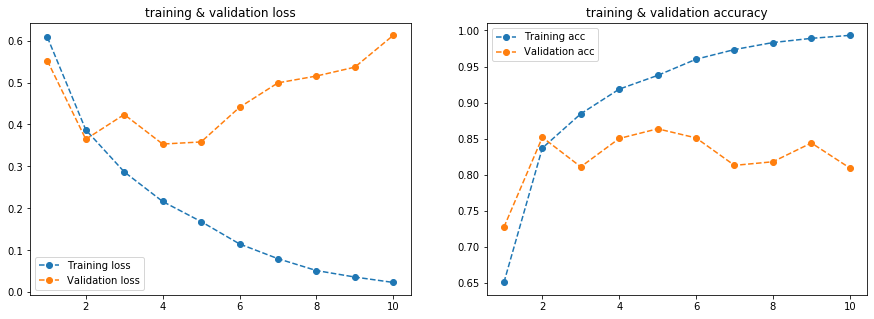

In [12]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)

### UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)

### TRAINING A MODEL USING LSTM LAYER

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 170s 8ms/step - loss: 0.4576 - acc: 0.7930 - val_loss: 0.3239 - val_acc: 0.8666
Epoch 2/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.2799 - acc: 0.8883 - val_loss: 0.3425 - val_acc: 0.8738
Epoch 3/10
20000/20000 [======================

### result

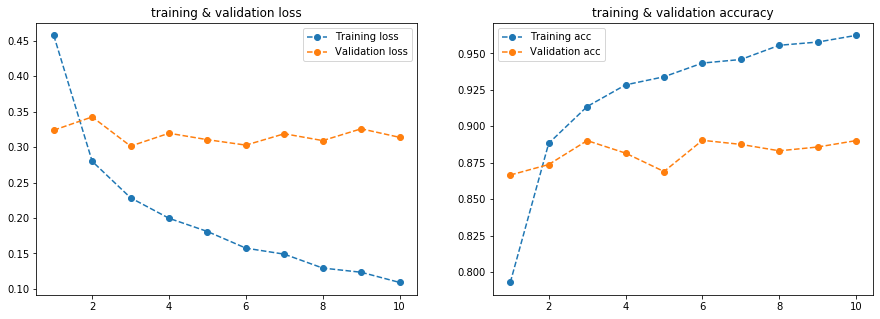

In [8]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)

### UNDERSTANDING BIDIRECTIONAL RNNs

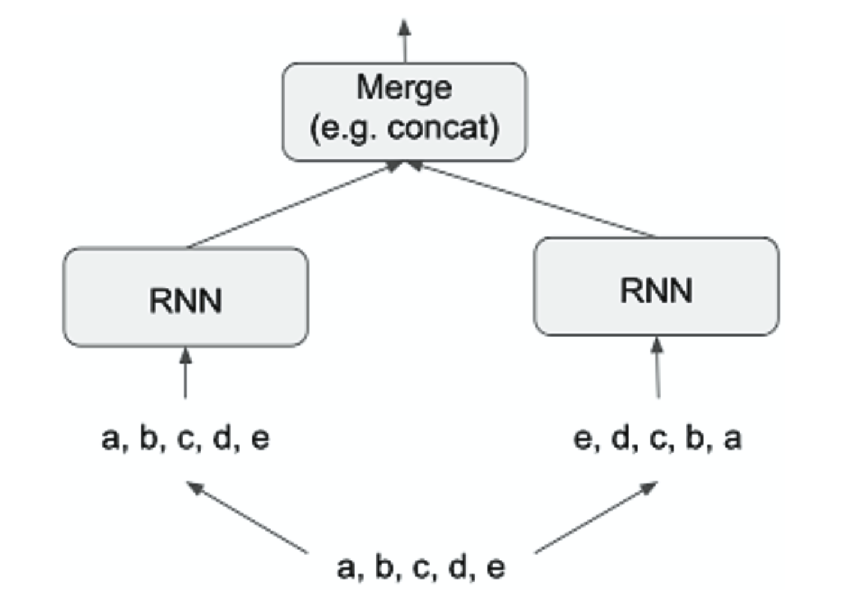

### reversing data for sequential model training


Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.

Data reversing
starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.6931 - acc: 0.5052 - val_loss: 0.6933 - val_acc: 0.5034
Epoch 2/10
20000/20000 [=======================

### result

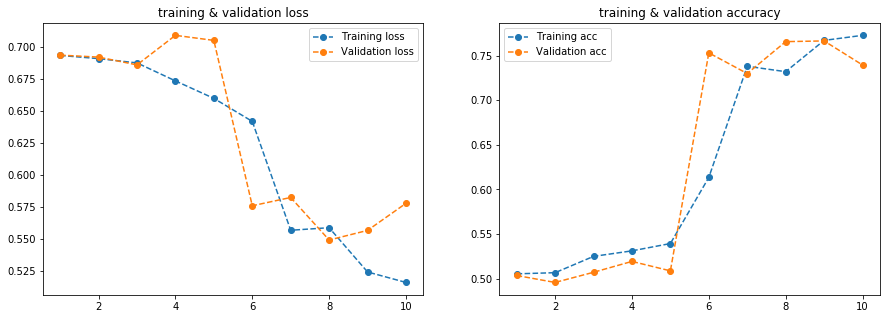


Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing



In [9]:
plot_large_image_without_borders("./pics/bi-directional_rnn.png")
display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)

print ("""
Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing
"""
)

### TRAINING AND EVALUATING A BIDIRECTIONAL LSTM

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.5068 - acc: 0.7586 - val_loss: 0.3894 - val_acc: 0.8356
Epoch 2/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3107 - acc: 0.8780 - val_loss: 0.3242 - val_acc: 0.8690
Epoch 3/10
20000/20000 [======================

### result

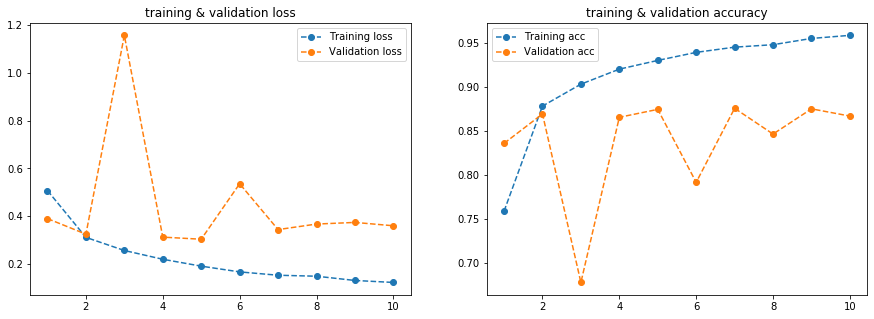


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.



In [10]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)

print ("""
It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.
"""
)

### UNDERSTANDING SEQUENCE PROCESSING WITH CONVNETS
![title](./pics/convnets.png)

### training and evaluating a simple 1D convnet

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_______________________________________

### result

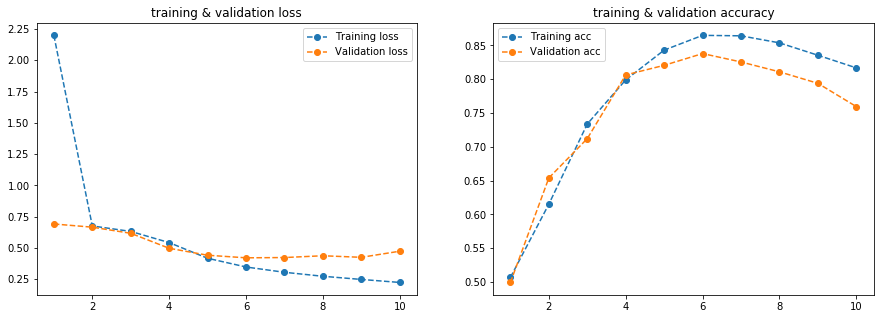

In [19]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)

### COMBINING CNNs & RNNs FOR LONG SEQUENCES"
![title](./pics/combined_model.png)

### training 1D convnet with GRU

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,322,177
Trainable params: 1,322,177
Non-trainable params: 0
_______________________________________

### result

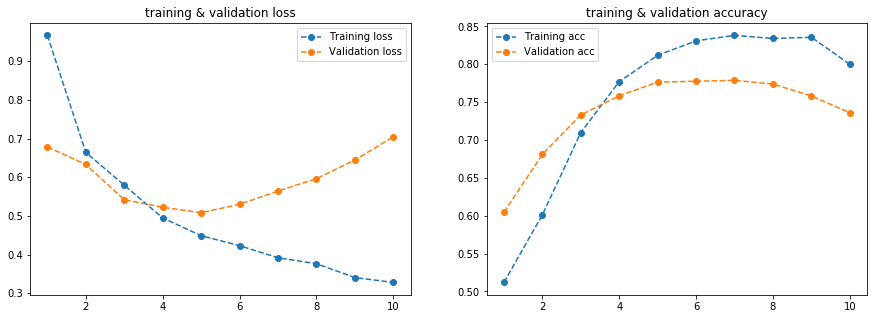

In [21]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history.history)